In [217]:
import random
import numpy as np
import math
from collections import Counter

In [101]:
print("Random float number is ", random.random())

Random float number is  0.39537738251267396


In [102]:
class MyAwesomeCasinoMachine:
    def __init__(self, mean=10, sd=1):
        self.mean = mean
        self.sd = sd
        self.N = 0
        
    def pull(self):
        sampled = np.random.normal(self.mean, self.sd)
        self.N +=1
        return sampled
    
    def get_success_rate(self):
        return self.success_rate

In [119]:
a = MyAwesomeCasinoMachine()
a.pull()

9.19428385085781

In [134]:
machine_n = 3


In [278]:
# Epsilon Greedy

def select_casino_epsilon_greedy(casino_machines, means, epsilon):
    sample = random.random()
    if(sample <= epsilon):
        return random.randint(0, machine_n - 1)
    else:
        return np.argmax(means)

In [289]:
def do_experiments(epsilon, max_iterations, means, selector = select_casino_epsilon_greedy):
    picked_machines_seq = []
    cumulative_means = []
    cumulative_mean = 0
    casino_machines = [MyAwesomeCasinoMachine(i*5, 3) for i in range(1, machine_n + 1)]
    
    for t in range(1, max_iterations + 1):
        selected_machine_idx = selector(casino_machines, means, epsilon)
        picked_machines_seq.append(selected_machine_idx)
        # Pull
        selected_machine = casino_machines[selected_machine_idx]
        result = selected_machine.pull()
        means[selected_machine_idx] = (selected_machine.N - 1)  * means[selected_machine_idx] / selected_machine.N + result / selected_machine.N
        cumulative_mean = (1.0-1.0/t) * cumulative_mean + float(result) / t
        cumulative_means.append(cumulative_mean)    
    print("True rate: " + str([m.mean for m in casino_machines]))
    print("Obtained rate: " + str(means))
    print("Tried", Counter(picked_machines_seq))
    return cumulative_means
#     plt.legend()
#     plt.show()

epsilon - 0.50
True rate: [5, 10, 15]
Obtained rate: [4.954975163706155, 10.01982671135523, 15.020997526903534]
Tried Counter({2: 66612, 1: 16716, 0: 16672})
epsilon - 0.10
True rate: [5, 10, 15]
Obtained rate: [4.942887499810628, 10.024018296650144, 15.006452156814353]
Tried Counter({2: 93202, 1: 3409, 0: 3389})
epsilon - 0.05
True rate: [5, 10, 15]
Obtained rate: [5.026620146563999, 9.990964195303608, 15.012457741942494]
Tried Counter({2: 96448, 0: 1822, 1: 1730})
epsilon - 0.01
True rate: [5, 10, 15]
Obtained rate: [4.928800177978108, 9.858604459564182, 15.005948193754875]
Tried Counter({2: 99360, 0: 331, 1: 309})


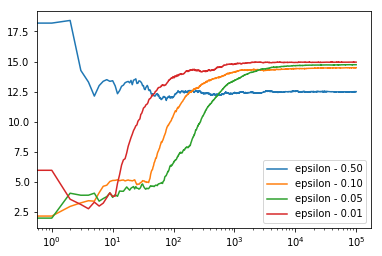

In [290]:
epsilons = [0.5 ,0.1, 0.05, 0.01]

for e in epsilons:
    print("epsilon - %.2f"%e)
    res = do_experiments(e, 100000, [0,0,0])
    plt.plot(res, label="epsilon - %.2f"%e)
plt.legend()
plt.xscale('log')
plt.show()

init means - 0
True rate: [5, 10, 15]
Obtained rate: [5.013990952901498, 9.991659228369114, 14.997465639161621]
Tried Counter({2: 93307, 0: 3420, 1: 3273})
init means - 15
True rate: [5, 10, 15]
Obtained rate: [4.907649817787711, 9.994631604307804, 14.996263426493135]
Tried Counter({2: 93241, 0: 3389, 1: 3370})
init means - 30
True rate: [5, 10, 15]
Obtained rate: [4.987726289767799, 9.880846157066541, 14.979995889439646]
Tried Counter({2: 93426, 0: 3328, 1: 3246})
init means - 50
True rate: [5, 10, 15]
Obtained rate: [5.032726467053466, 10.035994168805745, 14.989960355570998]
Tried Counter({2: 93403, 0: 3367, 1: 3230})
True rate: [5, 10, 15]
Obtained rate: [9.684109490263843, 6.364446891699603, 15.010599294170614]
Tried Counter({2: 99998, 0: 1, 1: 1})


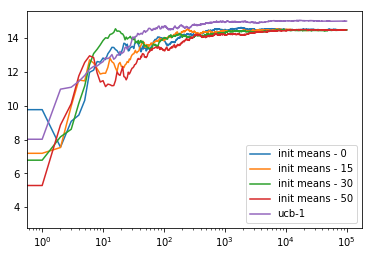

In [291]:
means = [0, 15, 30, 50]

for m in means:
    print("init means - %d"%m)
    res = do_experiments(0.1, 100000, [m,m,m])
    plt.plot(res, label = "init means - %d"%m)
    
res = do_experiments(0.1, 100000, [30, 30, 30], ucb1)
plt.plot(res, label="ucb-1")

plt.legend()
plt.xscale('log')
plt.show()

## UCB

In [292]:
def ucb1(casino_machines, means, e):
    total_N = sum([c.N for c in casino_machines]) + 1
    return np.argmax([m + math.sqrt(2 * np.log(total_N) / (casino_machines[i].N + 1))  for i, m in enumerate(means)])

True rate: [5, 10, 15]
Obtained rate: [4.881121544796252, 8.779733932547222, 14.964211893584775]
Tried Counter({2: 9997, 1: 2, 0: 1})
True rate: [5, 10, 15]
Obtained rate: [5.117518642300906, 10.20554976167691, 14.982892809501102]
Tried Counter({2: 9369, 1: 336, 0: 295})
True rate: [5, 10, 15]
Obtained rate: [4.795886215036692, 10.428926029824924, 15.000574948346713]
Tried Counter({2: 9340, 0: 337, 1: 323})


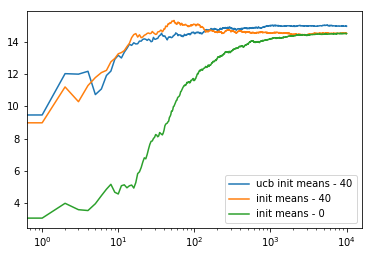

In [293]:
res = do_experiments(0.1, 10000, [40, 40, 40], ucb1)
plt.plot(res, label="ucb init means - %d"%40)

res = do_experiments(0.1, 10000, [40, 40, 40])
plt.plot(res, label="init means - %d"%40)

res = do_experiments(0.1, 10000, [0, 0, 0])
plt.plot(res, label="init means - %d"%0)

plt.legend()
plt.xscale('log')
plt.show()